# IPL Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [2]:
path = 'E:\Data Science 12 Projects\data_ipl'
# read the data
df = pd.read_csv(path + '/matches.csv')
# shape of the data
df.shape

(636, 18)

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# columns in the data
df.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
# columns types
df.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [6]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [7]:
df2 = pd.read_csv(path + '/deliveries.csv')
df2.shape

(150460, 21)

In [8]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
df2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# Indepth Analysis of David Warner(Australian Batsman) and his performance in IPL.
# Score Distribution For Teams by Innings

In [11]:
# filter df2 for batsman = 'DA Warner'
df_Warner = df2[df2['batsman'] == 'DA Warner']
df_Warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
df_Warner.shape

(2902, 21)

In [30]:
# check the dismisal kind
stats = df_Warner['dismissal_kind'].value_counts()

In [31]:
stats

caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

In [26]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot


In [21]:
px.pie(df_Warner, values=stats, labels=stats.index, title='Dismissal Kind of Warner')

e:\Data Science 12 Projects\.modules\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [34]:
trace1 = go.Pie(labels=stats.index, values=stats.values, name='Dismissal Kind of Warner')
layout = go.Layout(title='Dismissal Kind of Warner')
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [37]:
# check the runs scored by Warner
def count(df, runs):
    return len(df[df['batsman_runs'] == runs])*runs

In [38]:
count(df_Warner, 1)

997

In [49]:
count(df_Warner, 5)

0

In [48]:
score = [count(df_Warner, runs) for runs in range(1,7)]
score


[997, 414, 39, 1604, 0, 960]

In [50]:
# erase the zero values
score = [x for x in score if x != 0]
score

[997, 414, 39, 1604, 960]

In [51]:
labels = ['1', '2', '3', '4', '6']

In [54]:
trace2 = go.Pie(labels=labels, values=score, name='Runs Scored by Warner', pull=[0, 0, 0, 0.05, 0])
layout = go.Layout(title='Runs Scored by Warner')
fig = go.Figure(data=[trace2], layout=layout)
iplot(fig)

# Score Distribution For Teams by Innings

In [55]:
df2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [58]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [56]:
df2['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [127]:
# create a dictionary with the bowling team and a abreviation
Teams = {'Sunrisers Hyderabad':'SRH', 'Kolkata Knight Riders':'KKR', 'Royal Challengers Bangalore':'RCB', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL', 'Rising Pune Supergiant':'RPS', 'Delhi Daredevils':'DD', 'Kings XI Punjab':'KXIP', 'Rising Pune Supergiants':'RPS', 'Kochi Tuskers Kerala':'KTK', 'Deccan Chargers':'DC', 'Pune Warriors':'PW', 'Rajasthan Royals':'RR', 'Chennai Super Kings':'CSK', 'Delhi Capitals':'DC'}

In [59]:
df2['BAT_TEAM'] = df2['batting_team'].map(Teams)
df2['BOWL_TEAM'] = df2['bowling_team'].map(Teams)
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,BAT_TEAM,BOWL_TEAM
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,SRH,RCB
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,SRH,RCB


In [60]:
runs = df2.groupby(['match_id','inning','BAT_TEAM'])['total_runs'].sum().reset_index()
runs.head()

,match_id,inning,BAT_TEAM,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183


In [61]:
# drop match_id 
runs.drop('match_id', axis=1, inplace=True)
runs.head()

,inning,BAT_TEAM,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183


In [62]:
runs['inning'].unique()

array([1, 2, 3, 4], dtype=int64)

In [63]:
innings1 = runs[runs['inning'] == 1]
innings2 = runs[runs['inning'] == 2]
innings3 = runs[runs['inning'] == 3]
innings4 = runs[runs['inning'] == 4]
innings1.head()	

,inning,BAT_TEAM,total_runs
0,1,SRH,207
2,1,MI,184
4,1,GL,183
6,1,RPS,163
8,1,RCB,157


<AxesSubplot: xlabel='BAT_TEAM', ylabel='total_runs'>

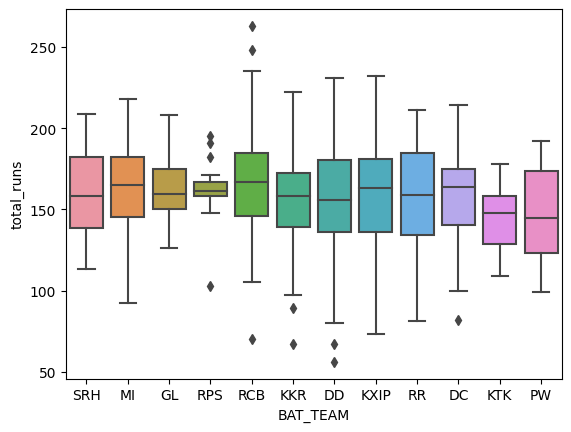

In [64]:
sns.boxplot(x='BAT_TEAM', y='total_runs', data=innings1)

<AxesSubplot: xlabel='BAT_TEAM', ylabel='total_runs'>

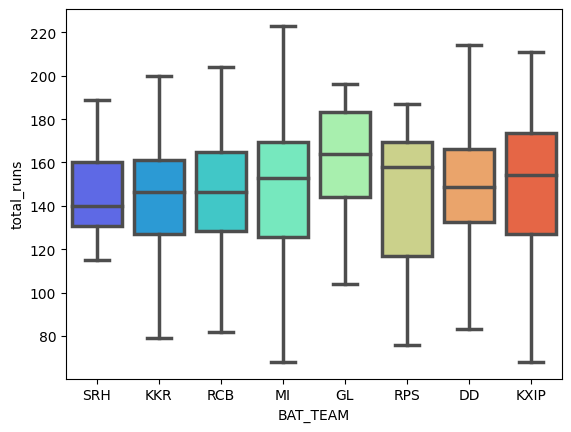

In [70]:
sns.boxplot(x='BAT_TEAM', y='total_runs', data=innings2, palette='rainbow', order=['SRH', 'KKR', 'RCB', 'MI', 'GL', 'RPS', 'DD', 'KXIP'], showfliers=False, linewidth=2.5, fliersize=5)

# How Many Times a Teams Scores more thean 200 Runs in a Match

In [71]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,BAT_TEAM,BOWL_TEAM
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,SRH,RCB
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,SRH,RCB


In [75]:
# total scrore runs
total_score_runs = df2.groupby(['match_id','inning','BAT_TEAM'])['total_runs'].sum().reset_index()
total_score_runs.head()

,match_id,inning,BAT_TEAM,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183


In [82]:
# totoal runs > 200
high_scores = total_score_runs[total_score_runs['total_runs'] >= 200]
high_scores.head()


,match_id,inning,BAT_TEAM,total_runs
0,1,1,SRH,207
16,9,1,DD,205
38,20,1,RCB,213
62,32,1,SRH,207
72,36,1,SRH,209


In [83]:
high_scores.shape

(55, 4)

In [84]:
high_scores['BAT_TEAM'].value_counts()

RCB     13
KXIP    11
MI       9
SRH      6
RR       6
DD       4
KKR      4
GL       1
DC       1
Name: BAT_TEAM, dtype: int64

<AxesSubplot: xlabel='BAT_TEAM', ylabel='count'>

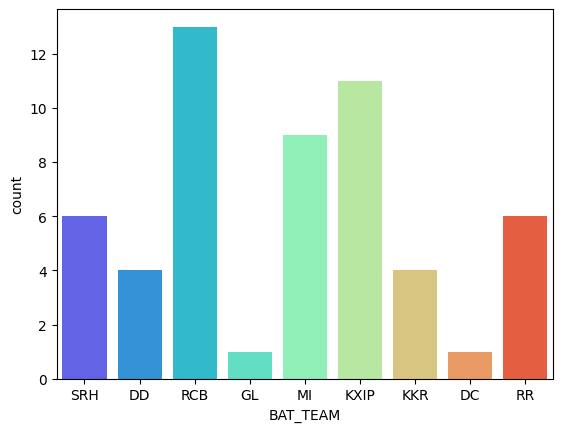

In [86]:
# add the values of the teams
sns.countplot(x='BAT_TEAM', data=high_scores, palette='rainbow')

In [94]:
balls = df2.groupby(['batsman'])['ball'].count().reset_index()
balls.head()

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57


# Top Ten Batsman in IPL
# Top Individual Scores Batsman in IPL
# Highest Wicket Traker in IPL

In [87]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,BAT_TEAM,BOWL_TEAM
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,SRH,RCB
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,SRH,RCB


In [95]:
# top 10 batsman
runs = df2.groupby(['batsman']).sum()['batsman_runs'].reset_index()
runs.head()

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62


# Match Analysis

In [96]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [97]:
# check the null values
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [98]:
df.drop(['umpire3'], axis=1, inplace=True)

In [111]:
df.isnull().sum()

id                  0
season              0
city                7
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              3
win_by_runs         0
win_by_wickets      0
player_of_match     3
venue               0
umpire1             1
umpire2             1
TEAM_1             77
TEAM_2             54
WINNER_TEAM        82
dtype: int64

In [100]:
Teams

{'Sunrisers Hyderabad': 'SRH',
 'Kolkata Knight Riders': 'KKR',
 'Royal Challengers Bangalore': 'RCB',
 'Mumbai Indians': 'MI',
 'Gujarat Lions': 'GL',
 'Rising Pune Supergiant': 'RPS',
 'Delhi Daredevils': 'DD',
 'Kings XI Punjab': 'KXIP',
 'Rising Pune Supergiants': 'RPS',
 'Kochi Tuskers Kerala': 'KTK',
 'Deccan Chargers': 'DC',
 'Pune Warriors': 'PW',
 'Rajasthan Royals': 'RR'}

In [101]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [103]:
df['TEAM_1'] = df['team1'].map(Teams)
df['TEAM_2'] = df['team2'].map(Teams)
df['WINNER_TEAM'] = df['winner'].map(Teams)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,TEAM_1,TEAM_2,WINNER_TEAM
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,SRH,RCB,SRH
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,MI,RPS,RPS
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,GL,KKR,KKR
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,RPS,KXIP,KXIP
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,RCB,DD,RCB


In [104]:
# Total matches
df['id'].count()

636

In [105]:
# total Venues
df['venue'].nunique()

35

In [115]:
# Total Teams
df['team1'].nunique()

14

In [107]:
# Most Men of the Match
df['player_of_match'].value_counts().head(10)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

In [109]:
# maximun wins by runs
df[df['win_by_runs'].max() == df['win_by_runs']]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,TEAM_1,TEAM_2,WINNER_TEAM
43,44,2017,Delhi,5/6/2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,MI,DD,MI


In [110]:
# Maximum wins by wickets
df[df['win_by_wickets'].max() == df['win_by_wickets']]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,TEAM_1,TEAM_2,WINNER_TEAM
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,GL,KKR,KKR
34,35,2017,Chandigarh,4/30/2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,DD,KXIP,KXIP
71,72,2008,Mumbai,4/27/2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,MI,DC,DC
119,120,2009,Cape Town,4/19/2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,KXIP,DD,DD
183,184,2010,Bangalore,3/18/2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,RR,RCB,RCB
298,299,2011,Mumbai,5/20/2011,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,MI,RR,RR
376,377,2012,Jaipur,5/20/2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,RR,MI,MI
390,391,2013,Chandigarh,4/10/2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,KXIP,NaN,NaN
542,543,2015,Delhi,4/26/2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,DD,RCB,RCB
590,591,2016,Rajkot,4/21/2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,GL,SRH,SRH


# toss Dexision across the season
# Maxium Toos Winners
# Total Maches vs Wins for Teams
# Matches played aacross each season

<AxesSubplot: xlabel='season', ylabel='count'>

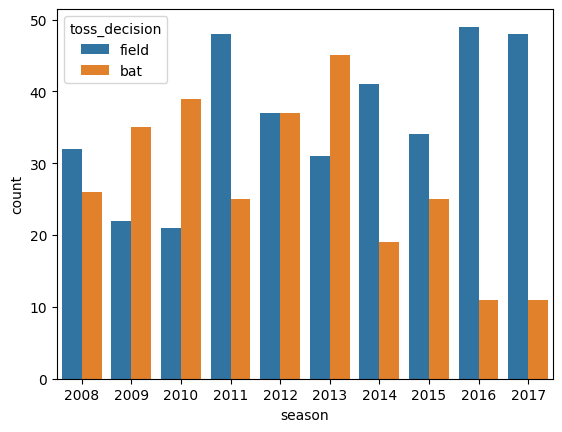

In [116]:
# Toss Decision across seasons
sns.countplot(x='season', hue='toss_decision', data=df)


In [118]:
# Maxium Toos Winners
toss_winners = df['toss_winner'].value_counts()

In [122]:
trace3 = go.Bar(x=toss_winners.index, y=toss_winners.values, name='Toss Winners')
layout = go.Layout(title='Toss Winners', xaxis=dict(title='Teams'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace3], layout=layout)
iplot(fig)

In [136]:
teams = (df['team1'].value_counts() + df['team2'].value_counts()).reset_index()
teams.columns = ['team', 'matches']
teams.head()

,team,matches
0,Chennai Super Kings,131
1,Deccan Chargers,75
2,Delhi Daredevils,147
3,Gujarat Lions,30
4,Kings XI Punjab,148


In [137]:
teams['team'] = teams['team'].map(Teams)
teams.head()


,team,matches
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KXIP,148


In [138]:
# sort the values
teams.sort_values('matches', ascending=False, inplace=True)
teams.head()

,team,matches
7,MI,157
12,RCB,152
4,KXIP,148
6,KKR,148
2,DD,147


In [139]:
#check nulls
teams.isnull().sum()

team       0
matches    0
dtype: int64

In [140]:
trace4 = go.Bar(x=teams['team'], y=teams['matches'], name='Matches Played')
layout = go.Layout(title='Matches Played', xaxis=dict(title='Teams'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace4], layout=layout)
iplot(fig)

In [141]:
# most wins by teams
wins = df['winner'].value_counts().reset_index()
wins.columns = ['team', 'wins']
wins.head()

,team,wins
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70


In [142]:
wins['team'] = wins['team'].map(Teams)
wins.head()

,team,wins
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70


In [148]:
team_stat = teams.merge(wins, on='team', how='inner')
team_stat.head()

,team,matches,wins
0,MI,157,92
1,RCB,152,73
2,KXIP,148,70
3,KKR,148,77
4,DD,147,62


In [149]:
# add a column for win percentage
team_stat['win_percentage'] = (team_stat['wins']/team_stat['matches'])*100
team_stat.head()

,team,matches,wins,win_percentage
0,MI,157,92,58.598726
1,RCB,152,73,48.026316
2,KXIP,148,70,47.297297
3,KKR,148,77,52.027027
4,DD,147,62,42.176871


In [150]:
trace5 = go.Bar(x=team_stat['team'], y=team_stat['win_percentage'], name='Win Percentage')
layout = go.Layout(title='Win Percentage', xaxis=dict(title='Teams'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace5], layout=layout)
iplot(fig)

In [152]:
trace7 = go.Bar(x=team_stat['team'], y=team_stat['wins'], name='Matches Wins')
trace6 = go.Bar(x=team_stat['team'], y=team_stat['matches'], name='Matches Played')
layout = go.Layout(title='Matches Wins vs Matches Played', xaxis=dict(title='Teams'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace6, trace7], layout=layout)
iplot(fig)

# Matches Played across each season

In [153]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,TEAM_1,TEAM_2,WINNER_TEAM
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,SRH,RCB,SRH
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,MI,RPS,RPS
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,GL,KKR,KKR
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,RPS,KXIP,KXIP
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,RCB,DD,RCB


In [154]:
df['date'].unique()

array(['4/5/2017', '4/6/2017', '4/7/2017', '4/8/2017', '4/9/2017',
       '4/10/2017', '4/11/2017', '4/12/2017', '4/13/2017', '4/14/2017',
       '4/15/2017', '4/16/2017', '4/17/2017', '4/18/2017', '4/19/2017',
       '4/20/2017', '4/21/2017', '4/22/2017', '4/23/2017', '4/24/2017',
       '4/26/2017', '4/27/2017', '4/28/2017', '4/29/2017', '4/30/2017',
       '5/1/2017', '5/2/2017', '5/3/2017', '5/4/2017', '5/5/2017',
       '5/6/2017', '5/7/2017', '5/8/2017', '5/9/2017', '5/10/2017',
       '5/11/2017', '5/12/2017', '5/13/2017', '5/14/2017', '5/16/2017',
       '5/17/2017', '5/19/2017', '5/21/2017', '4/18/2008', '4/19/2008',
       '4/20/2008', '4/21/2008', '4/22/2008', '4/23/2008', '4/24/2008',
       '4/25/2008', '4/26/2008', '4/27/2008', '4/28/2008', '4/29/2008',
       '4/30/2008', '5/1/2008', '5/2/2008', '5/25/2008', '5/3/2008',
       '5/4/2008', '5/5/2008', '5/6/2008', '5/7/2008', '5/8/2008',
       '5/9/2008', '5/28/2008', '5/10/2008', '5/11/2008', '5/12/2008',
       '5/13/20

In [155]:
# check the type of the date
type(df['date'][0])

str

In [156]:
# convert the date to datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2017-04-05
1   2017-04-06
2   2017-04-07
3   2017-04-08
4   2017-04-08
Name: date, dtype: datetime64[ns]

In [157]:
# add a column for year
df['year'] = df['date'].dt.year
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,TEAM_1,TEAM_2,WINNER_TEAM,year
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,SRH,RCB,SRH,2017
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,MI,RPS,RPS,2017
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,GL,KKR,KKR,2017
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,RPS,KXIP,KXIP,2017
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,RCB,DD,RCB,2017


In [158]:
# add a column for month
df['month'] = df['date'].dt.month
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,TEAM_1,TEAM_2,WINNER_TEAM,year,month
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,SRH,RCB,SRH,2017,4
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,MI,RPS,RPS,2017,4
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,GL,KKR,KKR,2017,4
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,RPS,KXIP,KXIP,2017,4
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,RCB,DD,RCB,2017,4


In [159]:
# matches played in each year
matches = df.groupby('year')['id'].count().reset_index()
matches.columns = ['year', 'matches']
matches.head()

,year,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74


In [160]:
trace8 = go.Bar(x=matches['year'], y=matches['matches'], name='Matches Played')
layout = go.Layout(title='Matches Played', xaxis=dict(title='Year'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace8], layout=layout)
iplot(fig)

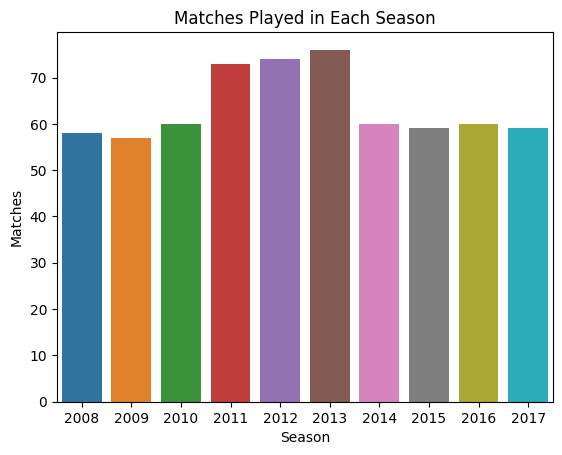

In [163]:
sns.countplot(x='season', data=df)
# add a title
plt.title('Matches Played in Each Season')
# add x and y labels
plt.xlabel('Season')
plt.ylabel('Matches')
# show the plot
plt.show()

# Runs across each season
# Average Runs per match across each season
# Most Lucky Grounds for Teams
# Most Unlucky Grounds for Teams
# comparison of two teams on the basis of their wins and losses

In [164]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,TEAM_1,TEAM_2,WINNER_TEAM,year,month
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,SRH,RCB,SRH,2017,4
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,MI,RPS,RPS,2017,4
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,GL,KKR,KKR,2017,4
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,RPS,KXIP,KXIP,2017,4
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,RCB,DD,RCB,2017,4


In [165]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'TEAM_1', 'TEAM_2', 'WINNER_TEAM', 'year', 'month'],
      dtype='object')

In [168]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,BAT_TEAM,BOWL_TEAM
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,SRH,RCB
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,SRH,RCB


Merge de df[] with df2

In [169]:
season = df[['id', 'season']].merge(df2, left_on='id', right_on='match_id', how='left').drop('id', axis=1)
season.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,BAT_TEAM,BOWL_TEAM
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,4,0,4,NaN,NaN,NaN,SRH,RCB
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,NaN,NaN,NaN,SRH,RCB
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,2,2,NaN,NaN,NaN,SRH,RCB


In [170]:
runs_by_season = season.groupby('season')['total_runs'].sum().reset_index()
runs_by_season.head()

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453


In [171]:
trace9 = go.Line(x=runs_by_season['season'], y=runs_by_season['total_runs'], name='Total Runs')
layout = go.Layout(title='Total Runs by Season', xaxis=dict(title='Season'), yaxis=dict(title='Total Runs'))
fig = go.Figure(data=[trace9], layout=layout)
iplot(fig)

e:\Data Science 12 Projects\.modules\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [173]:
# Average runs per match
matches_per_season = df.groupby('season')['id'].count().reset_index().rename(columns={'id':'matches'})
matches_per_season.head()

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74


In [176]:
# concat the two dataframes
season_stats = pd.concat([runs_by_season, matches_per_season['matches']], axis=1)
season_stats.head()


,season,total_runs,matches
0,2008,17937,58
1,2009,16353,57
2,2010,18883,60
3,2011,21154,73
4,2012,22453,74


In [177]:
season_stats['average_runs'] = season_stats['total_runs']/season_stats['matches']
season_stats.head()

,season,total_runs,matches,average_runs
0,2008,17937,58,309.258621
1,2009,16353,57,286.894737
2,2010,18883,60,314.716667
3,2011,21154,73,289.780822
4,2012,22453,74,303.418919


In [178]:
trace10 = go.Line(x=season_stats['season'], y=season_stats['average_runs'], name='Average Runs')
layout = go.Layout(title='Average Runs by Season', xaxis=dict(title='Season'), yaxis=dict(title='Average Runs'))
fig = go.Figure(data=[trace10], layout=layout)
iplot(fig)

e:\Data Science 12 Projects\.modules\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# Most Lucky Grounds for Teams

In [179]:
# Most lucky grounds
def lucky(df, team_name):
    return df[df['winner'] ==  team_name]['venue'].value_counts().nlargest(5)


<AxesSubplot: title={'center': 'Lucky Venues for Mumbai Indians'}>

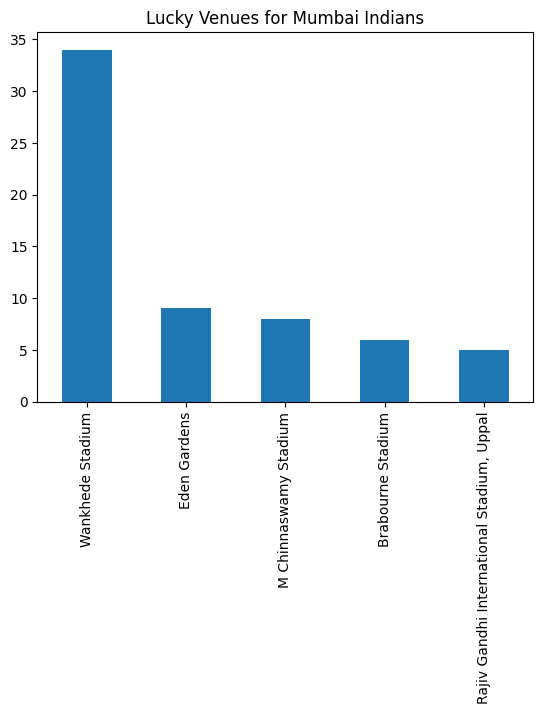

In [181]:
lucky(df, 'Mumbai Indians').plot(kind='bar', title='Lucky Venues for Mumbai Indians')

# Comparison of two teams on the basis of their wins and losses

In [183]:
def comparison(team1, team2):
    compared = df[((df['team1'] == team1) & (df['team2'] == team2)) | ((df['team1'] == team2) & (df['team2'] == team1))]
    sns.countplot(x='season', hue='winner', data=compared)
    plt.title('Comparison between {} and {}'.format(team1, team2))
    plt.show()


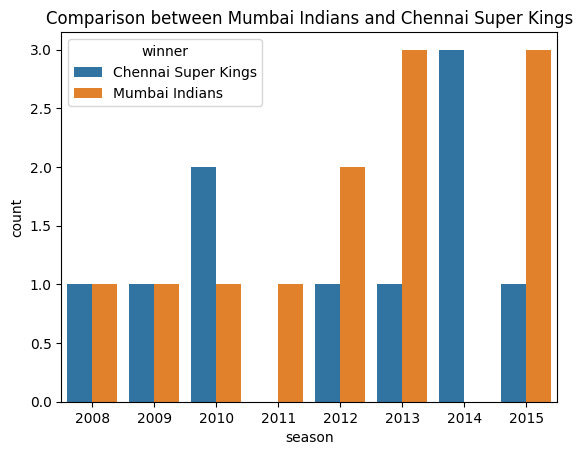

In [184]:
comparison('Mumbai Indians', 'Chennai Super Kings')
